# Taller 2
### Diego Ulises Cruz Cruz
#### 201412142

In [1]:

%pylab inline
import scipy
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
masa=152.0 # masa del Kart (kg)
ng=3.4 # Relación de Transmisión
a=0.2231 # Distancia del centro de gravedad al eje de la llanta trasera (m)
l=1.0063 # Distancia de eje de las llantas traseras y delanteras (m)
h=0.07478 # Altura del centro de gravedad del kart con respecto al piso (m)
mu_c=1 #coeficiente de adherencia de las ruedas

# Variables de tiempo
t_in=0 #Tiempo incial de analisis
t_acel=100 #Tiempo final para el analisis de la aceleracion
t_fren=10 #Tiempo final para el analisis del freno
deltat=0.001 # Paso del tiempo

In [3]:
# Variables de tiempo
t_in=0  
t_acel=100
t_fren=5
deltat=0.001
t=np.arange(t_in,t_acel,deltat)
t2=np.arange(t_in,t_fren,deltat)

x_0=0
v_0=0
a_0=0
c_ini = [x_0,v_0]


#Variables de aceleracion
ac=[]
vel=[]
pos=[]
pos.append(x_0) 
v=v_0
a=a_0
ac.append(a)
vel.append(v)





In [4]:
# Datos Llantas tractivas 
rll=0.139 # Radio geométrico de las llantas en traseras (m)
refc=0.98*rll # Radio efectivo llantas traseras (m)
rin=0.0631 #radio interno del neumático (m)
etaf=0.95
g=9.81
w=masa*g

# Datos Fuerzas de la fórmula de aceleración
rho=1.1955 # densidad del aire (kg/m^3)
dll=0.975 # Distancia entre ejes de llantas delanteras (m)
alj=0.88 # Altura con el piloto sentado en el kart (estatura 1.68 m) (m)
af=(dll*alj)/2 # Area Frontal Kart (m^2)
cd=0.89 # Coeficiente de Arrastre Kart
vw=0.0 # velocidad del viento (m/s)
theta=0.0 # Angulo carretera

# Inercias
ii=5.2E-3 # Inercia motor de combustión (kg m^2) 

mllt=1.43 # Masa llantas traseras (kg)
mlld=1.20 # Masa llantas delanteras (kg)
rlld=0.129 # Radio llantas delanteras (m)
rind=0.0631 # Radio rin llantas delanteras (m)
mbt=0.7*mllt # El porcentaje de la masa total que pesa la parte "banda" de la llanta trasera
mdt=0.3*mllt # El porcentaje de la masa total que pesa la parte "disco" de la llanta trasera
mbd=0.7*mlld # El porcentaje de la masa total que pesa la parte "banda" de la llanta delantera
mdd=0.3*mlld # El porcentaje de la masa total que pesa la parte "disco" de la llanta delantera
illd=(mbd*rlld)+(mdd*(rlld**2-rind**2))/2 # Inercia 1 llanta delantera (kg-m^2)
illt=(mbt*rll)+(mdt*(rll**2-rin**2))/2 # Inercia 1 llanta trasera (kg-m^2)
illTot=2*illd+2*illt

# Datos eje llantas
reje=0.02 # Radio eje de las llantas (m)
meje=3.832 # Masa del eje (kg)
ieje=(meje*reje**2)/2.0 # Inercia del eje de las llantas (kg-m^2)

# Fuerzas Aceleración
# Resistencia a la rodadura
a=0.2231 # Distancia del centro de gravedad al eje de la llanta trasera (m)
l=1.0063 # Distancia de eje de las llantas traseras y delanteras (m)
h=0.07478 # Altura del centro de gravedad del kart con respecto al piso (m)



In [5]:
masa_eq=((illTot)+(ieje)+(ii*ng**2))/refc**2

In [6]:
def frodadura(vx,ax):
    wr=w*((a/l)+(ax/g*(h/l))) # fuerza vertical sobre las llantas tractivas
    fr=0.01*(1+(vx/100.0)) # Factor de rodadura la velocidad del kart debe estar en (km/h)
    return wr*fr*np.cos(theta) # (N)


In [7]:
def farrastre(vx):
    return (1/2)*rho*af*cd*(vx+vw)**2 # (N)


In [8]:
def torquemotor(omega_m):
    omega_m=60*omega_m/(2*np.pi)
    P=-3.6134E-8*(omega_m**3)+2.9953E-5*(omega_m**2)+(1.6696*omega_m)+5.4706E-1
    T=P/(omega_m*(2*np.pi)/60)
    return T


In [9]:
def vangularmotor(vx):
    w=(vx*ng)/refc 
    rev=2*np.pi/60
    if w<(rev*50):
        w=rev*50
    if w>(rev*500):
        w=rev*500
        
    return w

In [10]:
def aceler(vx,t_ini):
    xx,v=vx
    a_x=ac[len(ac)-1]
    aceleracion=((torquemotor(vangularmotor(v))*ng*etaf)/refc-frodadura(v,a_x)
                 -farrastre(v))/(masa_eq+masa)
    ac.append(aceleracion)
    return [v,aceleracion]


In [11]:
def posicion(vt,l,t): 
    for i,p in enumerate(t):
        if(i>0):
            x=(p-t[i-1])*(vt[i]+vt[i-1])/2
            x=l[i-1]+x
            l.append(x)
            

In [12]:
def vel_max(v_a):
    v_max=0
    a=0
    for i,v in enumerate(v_a):
        if(v-v_max)>0.01:
            v_max=v
            a=i            
    return [v_max,a]


In [13]:
def freno(vx,t_ini):
    xx,v=vx
    vel2.append(v)
    
    if v<0:
        v=0
        af=0
        return [v,af]
    
    f_d=mu_c*(w/l)*(l-a+h*mu_c)
    f_t=mu_c*(w/l)*(a+h*mu_c)
    ax=ac2[len(ac2)-1]
    af=-f_d-f_t-frodadura(v,ax)-farrastre(v)
    af=af/(masa_eq+masa)
    ac2.append(af) 
    return [v,af]  
    

In [14]:
def graph_1(pos,solution,t):
    
    plt.xlabel('Tiempo [s]')
    
    plt.ylabel('Distancia [m]')
    
    plt.plot(t,solution[:,0])
    plt.twinx()
    plt.xlabel('Tiempo [s]')
    plt.plot(t,solution[:,1]*3.6,label='Distancia')
    plt.ylabel('Velocidad [km/h]')
    pylab.legend(loc='upper left');
    plt.grid(True)

In [15]:
def graph_2(pos,solution,t):
    plt.xlabel('Tiempo [s]')
    plt.plot(t,solution[:,1]*3.6,label='Velocidad')
    plt.ylabel('Velocidad [km/h]')
    plt.grid(True)

In [16]:
def graph(pos,solution,t):
    graph_1(pos,solution,t)
    graph_2(pos,solution,t)
    pylab.legend(loc='upper left');

In [17]:
sol = odeint(aceler,c_ini,t)

vel=sol[:,1]
pos1=posicion(sol[:,1],pos,t)


## Resultados y análisis de resultados

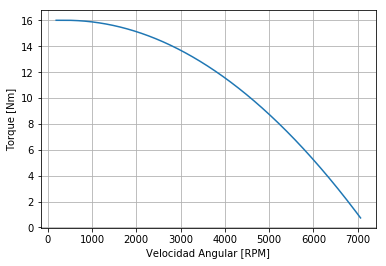

In [18]:
esp=np.linspace(20,740,1000)
torq=torquemotor(esp)
plt.grid(True)
esp=esp*(60/(2*np.pi))
plt.plot(esp,torq)
plt.xlabel("Velocidad Angular [RPM]")
plt.ylabel("Torque [Nm]");

### Aceleración

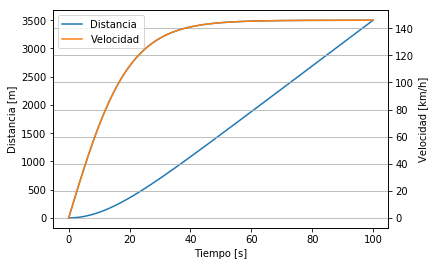

In [19]:
graph(pos1,sol,t)

In [20]:
v_max=vel_max(sol[:,1])[0]
u_max=vel_max(sol[:,1])[-1]
dist_recorr=pos[u_max]
t_max1=t[u_max]

print('El vehículo recorrió %.2f m hasta alcanzar la máxima velocidad del kart que es de %.2f m/s. Esta velocidad se alcanzó al cabo de %.2f s.' % (dist_recorr,v_max,t_max1))

El vehículo recorrió 3440.83 m hasta alcanzar la máxima velocidad del kart que es de 40.53 m/s. Esta velocidad se alcanzó al cabo de 98.54 s.


### Frenado

In [21]:
#Variables para frenado
x_f=0
v_f=max(vel)
pos2=[]
pos2.append(x_f)
vel2=[]
ac2=[]
ac2.append(ac[len(ac)-1])
c_ini2=[x_f,v_f]

In [22]:
sol2 = odeint(freno,c_ini2,t2)
vel2=sol2[:,1]
pos_2=posicion(sol2[:,1],pos2,t2)

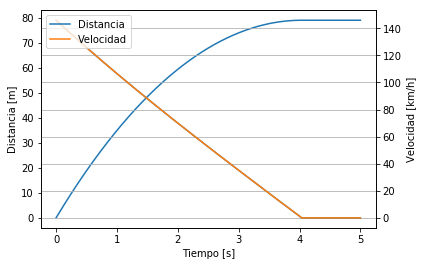

In [23]:
graph(pos_2,sol2,t2)

In [24]:
v_min=max(sol2[:,1])
fren_recorr=max(sol2[:,0])
b=0
for i,v in enumerate(sol2[:,1]):
    if (v<1e-6):        
        b=i
t_max2=t2[b]
print('La velocidad inicial al momento de frenado es de %.2f m/s, el vehículo alcanza a recorrer una distancia de %.2f m en %.2f s antes de detenerse completamente.' % (v_max,fren_recorr,t_max2))


La velocidad inicial al momento de frenado es de 40.53 m/s, el vehículo alcanza a recorrer una distancia de 79.06 m en 5.00 s antes de detenerse completamente.


### Modificando las relaciones de transmisión

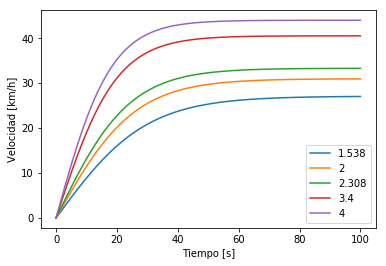

In [25]:
plt.xlabel('Tiempo [s]')
plt.ylabel('Velocidad [km/h]')

ng_l=[1.538,2,2.308,3.4,4]

for i in ng_l:
    ng=i
    plt.plot(t,odeint(aceler,c_ini,t)[:,1],label=i)
plt.legend();